In [1]:
import pandas as pd
import numpy as np

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ml-100k/u.data',sep='\t',names=['user_id','item_id','rating','ts'])

In [3]:
data.head()

,user_id,item_id,rating,ts
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100000 non-null  int64
 1   item_id  100000 non-null  int64
 2   rating   100000 non-null  int64
 3   ts       100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
items = pd.read_csv('ml-100k/u.item',sep='|',encoding='latin-1', names=['item_id','movie_title','year']+[str(i) for i in range(21)])
items.head()

,item_id,movie_title,year,0,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,20
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
ml = pd.merge(data.drop('ts',axis=1), items[['item_id','movie_title']], on='item_id')

In [7]:
ml.head()

,user_id,item_id,rating,movie_title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [8]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   item_id      100000 non-null  int64 
 2   rating       100000 non-null  int64 
 3   movie_title  100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.8+ MB


In [9]:
ml['user_id'].nunique()

943

In [10]:
ml['item_id'].nunique()

1682

In [11]:
ml['rating'].value_counts().sort_index()

1     6110
2    11370
3    27145
4    34174
5    21201
Name: rating, dtype: int64

In [12]:
ml['movie_title'].value_counts().head(25)

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

In [13]:
ml['movie_title'].value_counts().tail(30)

The Courtyard (1995)                                 1
Favor, The (1994)                                    1
Gate of Heavenly Peace, The (1995)                   1
Target (1995)                                        1
Cyclo (1995)                                         1
Girl in the Cadillac (1995)                          1
Promise, The (Versprechen, Das) (1994)               1
Small Faces (1995)                                   1
New Age, The (1994)                                  1
Wings of Courage (1995)                              1
Butterfly Kiss (1995)                                1
Land and Freedom (Tierra y libertad) (1995)          1
Lady of Burlesque (1943)                             1
Entertaining Angels: The Dorothy Day Story (1996)    1
Fear, The (1995)                                     1
Bloody Child, The (1996)                             1
Great Day in Harlem, A (1994)                        1
Yankee Zulu (1994)                                   1
Eye of Vic

In [15]:
sum(ml['movie_title'].value_counts()==1)

134

In [16]:
ml.count()

user_id        100000
item_id        100000
rating         100000
movie_title    100000
dtype: int64

In [23]:
len(ml['movie_title'].value_counts()[ml['movie_title'].value_counts()==1])

134

In [20]:
ml[['item_id','movie_title']].value_counts().index

MultiIndex([(  50,                                   'Star Wars (1977)'),
            ( 258,                                     'Contact (1997)'),
            ( 100,                                       'Fargo (1996)'),
            ( 181,                          'Return of the Jedi (1983)'),
            ( 294,                                   'Liar Liar (1997)'),
            ( 286,                        'English Patient, The (1996)'),
            ( 288,                                      'Scream (1996)'),
            (   1,                                   'Toy Story (1995)'),
            ( 300,                               'Air Force One (1997)'),
            ( 121,                      'Independence Day (ID4) (1996)'),
            ...
            (1571,          'Touki Bouki (Journey of the Hyena) (1973)'),
            (1572,                     'Wend Kuuni (God's Gift) (1982)'),
            (1349,                             'Mille bolle blu (1993)'),
            (1574,    

In [27]:
sum(ml['item_id'].value_counts()>70)

461

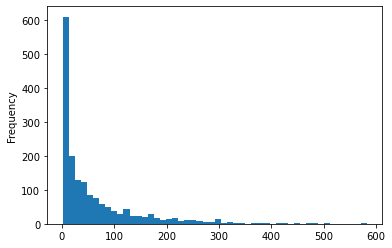

In [32]:
ml['item_id'].value_counts().plot.hist(bins=50)

In [30]:
sum(ml['item_id'].value_counts()<60)

1146

In [33]:
ml['rating'][ml['movie_title']=='Mission: Impossible (1996)'].mean()

3.313953488372093

In [38]:
for m in ml['movie_title'].unique():
    print(m, ml['rating'][ml['movie_title']==m].mean())

Kolya (1996) 3.9914529914529915
L.A. Confidential (1997) 4.161616161616162
Heavyweights (1994) 2.1538461538461537
Legends of the Fall (1994) 3.45679012345679
Jackie Brown (1997) 3.642857142857143
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) 4.252577319587629
Hunt for Red October, The (1990) 3.8634361233480177
Jungle Book, The (1994) 3.5647058823529414
Grease (1978) 3.347058823529412
Remains of the Day, The (1993) 3.94
Men in Black (1997) 3.745874587458746
Romy and Michele's High School Reunion (1997) 3.061224489795918
Star Trek: First Contact (1996) 3.66027397260274
To Wong Foo, Thanks for Everything! Julie Newmar (1995) 2.8947368421052633
Batman Forever (1995) 2.6666666666666665
Only You (1994) 3.1538461538461537
Age of Innocence, The (1993) 3.3846153846153846
Sabrina (1995) 3.5
Just Cause (1995) 3.142857142857143
Endless Summer 2, The (1994) 2.5
Man Without a Face, The (1993) 3.5441176470588234
Sabrina (1954) 3.796875
Die Hard (1988) 3.8724279835390947


In [37]:
ml.groupby('movie_title')['rating'].mean()

movie_title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [39]:
ml.groupby('movie_title')['rating'].count()

movie_title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [40]:
rating = pd.DataFrame(ml.groupby('movie_title')['rating'].mean())

In [41]:
rating.head()

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [42]:
rating['count'] = ml.groupby('movie_title')['rating'].count()

In [43]:
rating.head()

,rating,count
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [46]:
rating.sort_values('count',ascending=False).head(25)

,rating,count
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [47]:
rating.sort_values('rating',ascending=False).head(25)

,rating,count
movie_title,,
They Made Me a Criminal (1939),5.000000,1
Marlene Dietrich: Shadow and Light (1996),5.000000,1
"Saint of Fort Washington, The (1993)",5.000000,2
Someone Else's America (1995),5.000000,1
Star Kid (1997),5.000000,3
"Great Day in Harlem, A (1994)",5.000000,1
Aiqing wansui (1994),5.000000,1
Santa with Muscles (1996),5.000000,2
Prefontaine (1997),5.000000,3


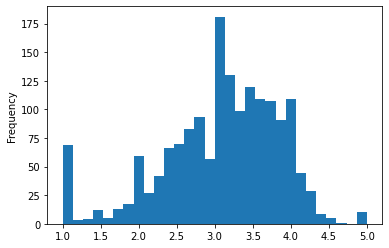

In [50]:
rating['rating'].plot.hist(bins=30)

### correlation

In [51]:
pt = ml.pivot_table(index='user_id', columns='movie_title',values='rating')

In [53]:
pt.head(50)

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<img src="https://www.gstatic.com/education/formulas2/355397047/en/correlation_coefficient_formula.svg">

In [54]:
query = 'toy story'

In [58]:
movie = [c for c in pt.columns if query in c.lower()]
movie

['Toy Story (1995)']

In [70]:
sim_mat = pd.DataFrame(pt.corrwith(pt[movie[0]]).dropna(),columns=['Corr'])
sim_mat.head()

,Corr
movie_title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728


In [73]:
sim_mat['rating'] = rating['rating']
sim_mat['count'] = rating['count']

In [83]:
query_rating = rating['rating'][movie].values[0]

In [84]:
query_rating

3.8783185840707963

In [85]:
sim_mat[(sim_mat['rating']>=query_rating)&(sim_mat['count']>100)].sort_values('Corr',ascending=False)

,Corr,rating,count
movie_title,,,
Toy Story (1995),1.000000,3.878319,452
"Great Escape, The (1963)",0.401238,4.104839,124
"African Queen, The (1951)",0.397874,4.184211,152
Cool Hand Luke (1967),0.384688,3.993902,164
Shine (1996),0.384044,3.922481,129
...,...,...,...
Blade Runner (1982),-0.004782,4.138182,275
2001: A Space Odyssey (1968),-0.069060,3.969112,259
Raging Bull (1980),-0.083523,4.120690,116


In [87]:
rec = sim_mat[(sim_mat['rating']>=query_rating)&(sim_mat['count']>100)].sort_values('Corr',ascending=False).head().index

In [88]:
rec = [r for r in rec if r not in movie]

In [90]:
rec[0]

'Great Escape, The (1963)'